# MPS using the deesse wrapper - custom search neighborhood

## Main points addressed:
- setting custom search ellipsoid

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)
geone version: 1.1.12


## Training image (TI)

In [3]:
# Read file 
data_dir = 'data'
filename = os.path.join(data_dir, 'ti.txt')
ti = gn.img.readImageTxt(filename)

# Values in the TI
ti.get_unique()

[0.0, 1.0, 2.0]

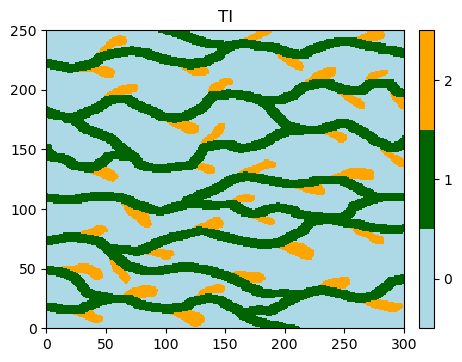

In [4]:
# Setting for categories / colors
categ_val = [0, 1, 2]
categ_col = ['lightblue', 'darkgreen', 'orange']

plt.figure(figsize=(5,5))
gn.imgplot.drawImage2D(ti, categ=True, categVal=categ_val, categCol=categ_col, title='TI')
plt.show()

## Custom search ellipsoid 
### Class `geone.deesseinterface.SearchNeighborhoodParameters`
To simulate a cell in the simulation grid, the pattern made up of (at most) the `nneighboringNode` informed cells the closest to the simulated cell is retrieved. Only the cells within a search ellipsoid centered at the simulated cell are considered. The search ellipsoid is defined by
- `rx`, `ry`, `rz`: radii in each direction, in number of cells,
- `ax`, `ay`, `az`: anisotropy ratios (or inverse units): the distance to the central node is the Euclidean distance with cell unit: `1/ax` by `1/ay` by `1/az`
- `angle1`, `angle2`, `angle3`: azimuth, dip, and plunge angles in degrees (default:`0`, `0`, `0`) to re-orient the search ellipsoid
- `power`: a power (default: `0`) at which the distance to the central cell is raised, to get the weight of the pattern cells

Several modes are available to set the radii (`radiusMode`), in particular:
- `large_default` (default): large radii automatically computed according to the size of the simulation grid and the TI
- `manual`: the parameters `rx`, `ry`, `rz` are required (set manually)

Several modes are available to set the anisotropy ratios (`anisotropyRatioMode`), in particular:
- `one` (default): anisotropy ratios automatically set to `ax=ay=az=1.0`
- `radius`: anisotropy ratios automatically set to the corresponding radius, `ax=rx`, `ay=ry`, `az=rz`, so that the distance on the border of the search ellipsoid is equal to one
- `manual`: `ax`, `ay`, `az` are required (set manually)

**Notes:** 
- It can be useful to limit the size of the search ellipsoid (by setting the radii) in presence of a small hard data set, in order to avoid realizations with too poor variability.
- It can be useful to set the anisotropy ratios manually to preferentially search in some direction(s) when retrieving the pattern for simulating a cell.

### Examples using different search neigbhorhood ellipsoids

#### Simulation with default search ellipsoid

In [5]:
# Default search ellipsoid
deesse_input1 = gn.deesseinterface.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    TI=ti,
    distanceType='categorical',
    nneighboringNode=24,
    distanceThreshold=0.02,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

# Run deesse
t1 = time.time() # start time
deesse_output1 = gn.deesseinterface.deesseRun(deesse_input1)
t2 = time.time() # end time
print(f'Elapsed time: {t2-t1:.2g} sec')

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230411 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete
Elapsed time: 0.81 sec


#### Simulation with small search ellipsoid by setting the radii manually

In [6]:
# Search ellipsoid with small radii
snp = gn.deesseinterface.SearchNeighborhoodParameters(
    radiusMode='manual', rx=10, ry=10, rz=0
)

deesse_input2 = gn.deesseinterface.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    TI=ti,
    distanceType='categorical',
    searchNeighborhoodParameters = snp, # set search neighborhood parameters (ellipsoid)
    nneighboringNode=24,
    distanceThreshold=0.02,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

# Run deesse
t1 = time.time() # start time
deesse_output2 = gn.deesseinterface.deesseRun(deesse_input2)
t2 = time.time() # end time
print(f'Elapsed time: {t2-t1:.2g} sec')

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230411 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete
Elapsed time: 0.56 sec


#### Simulation with anisotropic search ellipsoid (preferential search in one direction)

In [7]:
# Anisotropic search ellipsoid with preferential search in x-direction
snp = gn.deesseinterface.SearchNeighborhoodParameters(
    anisotropyRatioMode='manual', ax=20, ay=1, az=1
)

deesse_input3 = gn.deesseinterface.DeesseInput(
    nx=100, ny=100, nz=1,
    nv=1, varname='code',
    TI=ti,
    distanceType='categorical',
    searchNeighborhoodParameters = snp, # set search neighborhood parameters (ellipsoid)
    nneighboringNode=24,
    distanceThreshold=0.02,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

# Run deesse
t1 = time.time() # start time
deesse_output3 = gn.deesseinterface.deesseRun(deesse_input3)
t2 = time.time() # end time
print(f'Elapsed time: {t2-t1:.2g} sec')

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230411 / OpenMP 19 thread(s)]
* checking out license OK.
DeeSse run complete
Elapsed time: 0.18 sec


#### Results and display

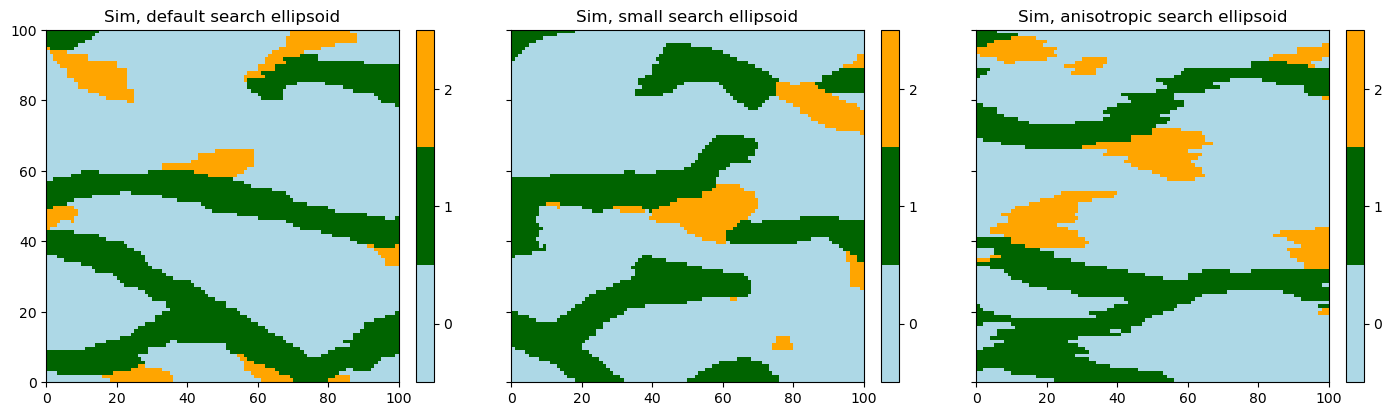

In [9]:
# Retrieve the realizations
sim1 = deesse_output1['sim']
sim2 = deesse_output2['sim']
sim3 = deesse_output3['sim']

# Display
plt.subplots(1, 3, figsize=(17,5), sharey=True) # 1 x 3 sub-plots

plt.subplot(1, 3, 1)
gn.imgplot.drawImage2D(sim1[0], categ=True, categVal=categ_val, categCol=categ_col, 
                       title='Sim, default search ellipsoid')

plt.subplot(1, 3, 2)
gn.imgplot.drawImage2D(sim2[0], categ=True, categVal=categ_val, categCol=categ_col, 
                       title='Sim, small search ellipsoid')

plt.subplot(1, 3, 3)
gn.imgplot.drawImage2D(sim3[0], categ=True, categVal=categ_val, categCol=categ_col, 
                       title='Sim, anisotropic search ellipsoid')

plt.show()